<a href="https://colab.research.google.com/github/Geon27/4-1-Bitcoin/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EA%B3%BC%EC%A0%9C_%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_1129(%EC%A4%80%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#환경설정

In [ ]:
# http://corazzon.github.io/matplotlib_font_setting
# 한글폰트 불러오기: 런타임을 다시 시작한 후 적용되기 때문에 실행 후
# 런타임 다시 시작(ctrl+M.) 후 다시 한번 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

Text(0.5, 0, '시간(분)')

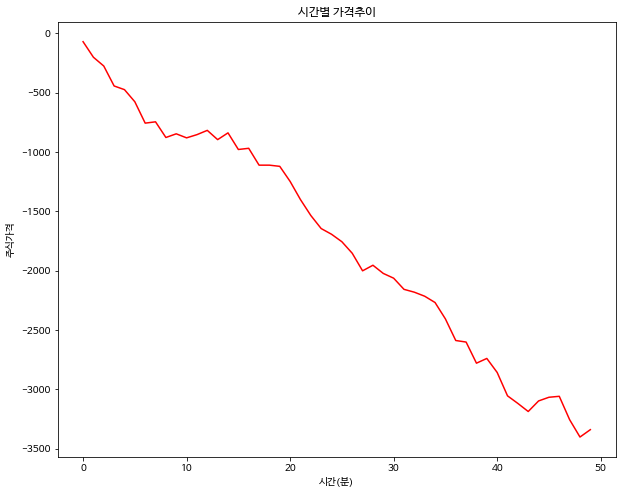

In [ ]:
# 한글그래프 되는지 확인
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data
# 한글을 넣어놓고 그러보면 깨진다, 런타임 다시 실행시 한글이 나타남
plt.figure(figsize=(10,8)); plt.plot(range(50), data, 'r'); plt.title('시간별 가격추이')
plt.ylabel('주식가격'); plt.xlabel('시간(분)')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# csv 파일로드

In [ ]:
#df = pd.read_csv("data/bike-station-207.csv", low_memory=False)
df = pd.read_csv("/content/drive/MyDrive/비트코인_시계열/20.01.01 ~ 22.10.31.csv", low_memory=False)
df.shape

(1035, 7)

In [ ]:
df.head(15)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%
5,2020-01-06,"7,759.10","7,372.60","7,783.10","7,366.70",786.75K,5.24%
6,2020-01-07,"8,155.70","7,759.10","8,182.00","7,754.10",1.01M,5.11%
7,2020-01-08,"8,059.60","8,154.20","8,436.40","7,900.80",1.19M,-1.18%
8,2020-01-09,"7,842.40","8,060.00","8,065.90","7,779.20",786.50K,-2.70%
9,2020-01-10,"8,187.10","7,842.50","8,187.40","7,697.70",1.05M,4.40%


In [ ]:
df.tail(15)

,날짜,종가,오픈,고가,저가,거래량,변동 %
1020,2022-10-17,"19,548.20","19,262.20","19,663.50","19,163.60",248.40K,1.49%
1021,2022-10-18,"19,328.20","19,548.40","19,692.90","19,102.80",290.07K,-1.13%
1022,2022-10-19,"19,123.90","19,328.20","19,358.60","19,101.20",209.28K,-1.06%
1023,2022-10-20,"19,042.90","19,125.10","19,334.50","18,935.60",253.20K,-0.42%
1024,2022-10-21,"19,162.60","19,042.90","19,245.50","18,703.30",294.66K,0.63%
1025,2022-10-22,"19,204.80","19,162.60","19,249.90","19,116.10",118.24K,0.22%
1026,2022-10-23,"19,571.20","19,204.80","19,680.90","19,092.50",180.63K,1.91%
1027,2022-10-24,"19,331.50","19,571.20","19,588.60","19,177.20",286.94K,-1.22%
1028,2022-10-25,"20,082.70","19,331.80","20,406.90","19,249.00",371.54K,3.89%
1029,2022-10-26,"20,769.50","20,086.80","20,981.50","20,062.90",427.99K,3.42%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1035 non-null   object
 1   종가      1035 non-null   object
 2   오픈      1035 non-null   object
 3   고가      1035 non-null   object
 4   저가      1035 non-null   object
 5   거래량     1035 non-null   object
 6   변동 %    1035 non-null   object
dtypes: object(7)
memory usage: 56.7+ KB


In [ ]:
df.columns

Index(['날짜', '종가', '오픈', '고가', '저가', '거래량', '변동 %'], dtype='object')

In [ ]:
pd.Series(df.columns)

0      날짜
1      종가
2      오픈
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [ ]:
df["날짜연월"] = df["날짜"].apply(lambda x : x[:7])

In [ ]:
df

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%,2020-01
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%,2020-01
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%,2020-01
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%,2020-01
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%,2020-01
...,...,...,...,...,...,...,...,...
1030,2022-10-27,"20,292.90","20,769.50","20,867.90","20,231.60",365.49K,-2.29%,2022-10
1031,2022-10-28,"20,594.40","20,293.00","20,744.00","20,058.20",318.90K,1.49%,2022-10
1032,2022-10-29,"20,809.80","20,594.20","21,038.10","20,561.90",276.54K,1.05%,2022-10
1033,2022-10-30,"20,626.30","20,809.40","20,922.30","20,522.50",207.63K,-0.88%,2022-10


#날짜데이터

###날짜데이터 변환

In [ ]:
# 날짜 형식을 datetime의 type로 변환
df["날짜"] = pd.to_datetime(df["날짜"])          
df[["날짜"]].dtypes

날짜    datetime64[ns]
dtype: object

In [ ]:
# df의 전체 값 확인
df

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%,2020-01
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%,2020-01
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%,2020-01
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%,2020-01
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%,2020-01
...,...,...,...,...,...,...,...,...
1030,2022-10-27,"20,292.90","20,769.50","20,867.90","20,231.60",365.49K,-2.29%,2022-10
1031,2022-10-28,"20,594.40","20,293.00","20,744.00","20,058.20",318.90K,1.49%,2022-10
1032,2022-10-29,"20,809.80","20,594.20","21,038.10","20,561.90",276.54K,1.05%,2022-10
1033,2022-10-30,"20,626.30","20,809.40","20,922.30","20,522.50",207.63K,-0.88%,2022-10


In [ ]:
df["연도"] = df["날짜"].dt.year
df["월"] = df["날짜"].dt.month
df["일"] = df["날짜"].dt.day
df["요일"] = df["날짜"].dt.dayofweek
df["일자"] = df["날짜"].dt.date

df.sample()

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월,연도,월,일,요일,일자
788,2022-02-27,"37,689.10","39,116.60","39,838.50","37,062.30",66.14K,-3.65%,2022-02,2022,2,27,6,2022-02-27


In [ ]:
#df["대여시간"].value_counts().sort_values(ascending=True)
# df["거래량"].value_counts().sort_index()
df["날짜연월"].sort_index()

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
1030    2022-10
1031    2022-10
1032    2022-10
1033    2022-10
1034    2022-10
Name: 날짜연월, Length: 1035, dtype: object

###날짜데이터 시각화

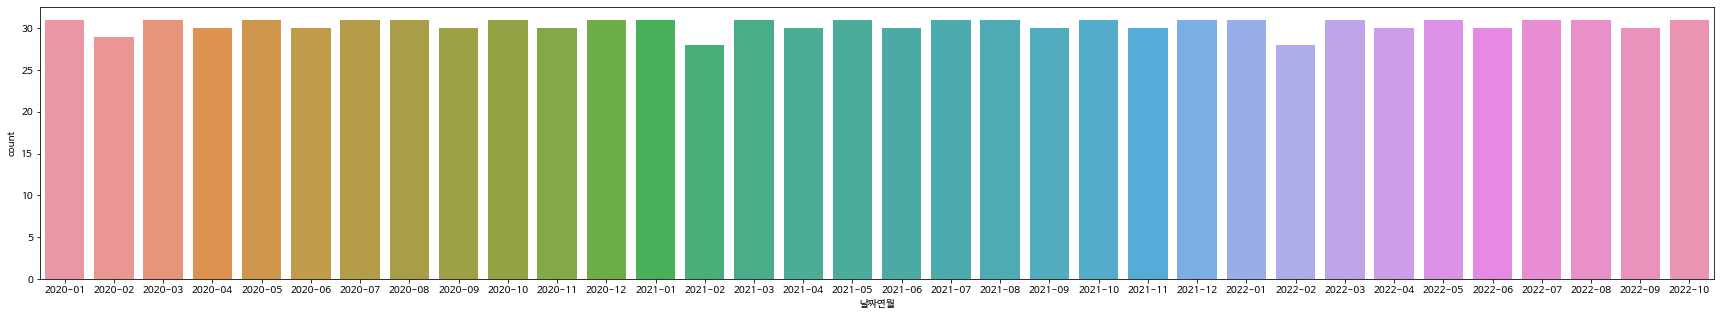

In [ ]:
  # 수치를 집계해보기 전에 countplot으로 분석, 'year'의 값 확인
  plt.figure(figsize=(30, 5))
  sns.countplot(data=df, x="날짜연월")

### 월별 / 년도별 거래량, 변동량 확인

In [ ]:
df.dtypes

날짜      datetime64[ns]
종가              object
오픈              object
고가              object
저가              object
거래량             object
변동 %            object
날짜연월            object
연도               int64
월                int64
일                int64
요일               int64
일자              object
dtype: object

In [ ]:
# value 값은 "대여일시"로 넣어주었는데 어떤 컬럼을 넣어주어도 count값을 동일하게 구한다.
# 대여일자로 구하게 되면 reset_index()에서 컬럼명이 중복되기 때문에 오류가 발생해서 다른 컬럼으로 구해왔다.
df_rent_group = df.groupby(["날짜연월","연도","월","일","요일","일자"])["종가"].sum()
df_rent_group.head()

날짜연월     연도    월  일  요일  일자        
2020-01  2020  1  1  2   2020-01-01    7,199.80
                  2  3   2020-01-02    6,967.00
                  3  4   2020-01-03    7,343.10
                  4  5   2020-01-04    7,376.80
                  5  6   2020-01-05    7,372.50
Name: 종가, dtype: object

In [ ]:
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["날짜연월","연도","월","일","요일","일자","종가"]
df_rent.head()

,날짜연월,연도,월,일,요일,일자,종가
0,2020-01,2020,1,1,2,2020-01-01,"7,199.80"
1,2020-01,2020,1,2,3,2020-01-02,"6,967.00"
2,2020-01,2020,1,3,4,2020-01-03,"7,343.10"
3,2020-01,2020,1,4,5,2020-01-04,"7,376.80"
4,2020-01,2020,1,5,6,2020-01-05,"7,372.50"


###시간데이터별 거래량, 변동량 시각화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ea9fe21d0>,
      dtype=object)

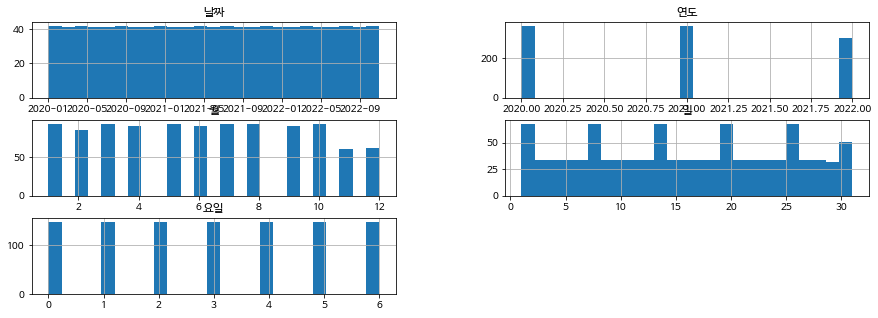

In [ ]:
# 수치 데이터를 히스토그램으로 표현해 본다.
# 수치 데이터를 막대그래프로 표현하기 위해서는 도수분포표를 만들고 이를 시각화 하는 것이 히스토그램이다.
df.hist(figsize = (15,5), bins=25)

In [ ]:
df_rent_year = df_rent.groupby('연도')['종가'].mean()
df_rent_year

TypeError: ignored

In [ ]:
df_rent_year.plot.bar(rot=0)

In [ ]:
df_rent_day = df_rent.groupby('일자')['종가'].mean()
df_rent_day.plot(rot=30, figsize=(15, 5))

In [ ]:
df_rent_2020 = df_rent[df_rent["연도"] == 2020]
df_rent_2020.groupby('월')['종가'].mean().plot.bar(rot=0)

In [ ]:
df_rent_month = df_rent.groupby('월')['종가'].mean()
df_rent_month.plot.bar(rot=0)

TypeError: ignored

In [ ]:
# 대여연도와 월별 대여수 평균을 구한다.
df_rent_날짜연월 = df_rent.groupby('날짜연월')['종가'].mean()
df_rent_날짜연월

In [ ]:
df_rent_날짜연월.plot.bar(rot=30, figsize=(15, 5))

In [ ]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="날짜연월", y="종가")
sns.pointplot(data=df_rent, x="날짜연월", y="종가")

In [ ]:
df_rent.groupby('날짜연월')['종가'].mean().plot(rot=30, figsize=(15, 5))

In [ ]:
fig,axs = plt.subplots(3,1)

df_rent["일"].plot(figsize = (15,8), title = "일별", ax = axs[0])
df_rent["월"].plot(figsize = (15,8), title = "월별", ax = axs[2])

#시계열 분석

## Simple Moving Average

In [ ]:
# Determine rolling statistics
# 30일치 rolling mean을 구해서 시각화 합니다.
rolmean = df_rent_day.rolling(window=12).mean()  # 열 기준으로 계산할 경우 행의 수
# window size 30 denotes 30 days, giving rolling mean at monthly level
rolstd = df_rent_day.rolling(window=12).std()

In [ ]:
rolmean

In [ ]:
rolstd

In [ ]:
import matplotlib.pyplot as plt

df_rent_day.plot(label='Original')
rolmean.plot(label='Rolling Mean')
rolstd.plot(label='Rolling Std', figsize=(15, 5))

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

## Weighted Moving Average
* exponentially-weighted-windows
* [Computational tools — pandas 0.25.0 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows)

In [ ]:
df_rent['WMA12'] = df_rent['종가'].ewm(span=12).mean()
df_rent['WMA6'] = df_rent['종가'].ewm(span=6).mean()

In [ ]:
df_rent[['일자', '종가', 'WMA6','WMA12']].plot(x='일자', figsize=(15,5))

## Simple Exponential Smoothing

In [ ]:
# 데이터셋을 train과 test 로 나눈다.
train = pd.DataFrame(df_rent_day[:800])
test = pd.DataFrame(df_rent_day[800:])

In [ ]:
train["종가"].plot(figsize=(15,5))
test["종가"].plot(title='train과 test세트로 분할')

In [ ]:
# import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(pd.np.asarray(train['종가'].astype(np.float)))

In [ ]:
ses_result = ses_model.fit()
ses_result

In [ ]:
y_hat = test.copy()
y_hat['SES'] = ses_result.forecast(len(test))
y_hat['SES'][:3]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['종가'], label='Train')
plt.plot(test['종가'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

In [ ]:
rmse = {}
# root mean squared error 로 오차를 계산해 본다.
rmse["SES"] = np.sqrt(np.square(test['종가'] - y_hat['SES']).mean())
rmse["SES"]

In [ ]:
rmse

# ARIMA 모델

## Seasonal ARIMA
* 참고 : [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

### Trend
* p: Trend autoregression order. AR(p)모형의 p차수
* d: Trend difference order. 트랜드를 제거하여 안정시계열로 만들기 위한 I(d)의 차분 차수 d
* q: Trend moving average order. MA(q)의 q차수 

### Seasonal
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [ ]:
# 데이터셋을 train과 test 로 나눈다.
train = pd.DataFrame(df_rent_day[:800])
test = pd.DataFrame(df_rent_day[800:])

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
m = 7
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
seasonal_pdq

In [ ]:
# Grid Search와 유사하게 최적의 파라메터 값을 찾는다.
y = train['종가'].to_list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f"ARIMA{param}x{param_seasonal}{m} - AIC:{results.aic}")
        except:
            continue

In [ ]:
# from statsmodels.tsa.ar_model import AR
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, acf
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.stattools import adfuller

In [ ]:
!pip install statsmodels==0.12.2

In [ ]:
from statsmodels.api import tsa

In [ ]:
# ARIMA(p,d,q)(P,D,Q)m
# ARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:10083.141308943608
arima = tsa.statespace.SARIMAX(train['종가'].to_list(),
                                  order=(1,1,1),
                                  seasonal_order=(0,1,1,7),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# 학습
arima_result = arima.fit()
print(arima_result.summary().tables[1])

In [ ]:
arima_result

In [ ]:
arima_result.plot_diagnostics(figsize=(15, 10))

In [ ]:
# 예측
predict_value = arima_result.predict(start=801, end=880, dynamic=True)
predict_value[:5]

In [ ]:
y_hat = test.copy()
y_hat['ARIMA'] = predict_value
y_hat.head()

In [ ]:
len(y_hat)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['대여수'], label='Train')
plt.plot(test['대여수'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [ ]:
# root mean squared error 로 오차를 계산해 본다., 작을수록 좋음
rmse = {}
rmse["ARIMA"] = np.sqrt(np.square(test['대여수'] - y_hat['ARIMA']).mean())
#print(rmse["ARIMA"])
print(type(rmse))

In [ ]:
rmse

## auto-ARIMA

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(train['종가'], stepwise=False, seasonal=True)
auto_arima

In [ ]:
auto_arima.summary()

In [ ]:
#arima_result = auto_arima.fit()

In [ ]:
#len(test)
#auto_arima.predict(n_periods=len(test))

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
print(forecast_test_auto)
#y_hat['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)
y_hat['auto_ARIMA'] = list(forecast_test_auto)

In [ ]:
y_hat

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['대여수'], label='Train')
plt.plot(test['대여수'], label='Test')
plt.plot(y_hat['auto_ARIMA'], label='Auto ARIMA')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()